In [34]:
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk import word_tokenize, sent_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import re, string

In [8]:
df = pd.read_csv('E:/Data Science/3.Projects/Spam-Ham Classifier/SMSSpamCollections', sep = '\t', names = ['Label', 'Message'])


In [9]:
df.head()

,Label,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### EDA

In [12]:
df['Length'] = df['Message'].apply(len)

In [13]:
df.Length

0       111
1        29
2       155
3        49
4        61
       ... 
5567    160
5568     36
5569     57
5570    125
5571     26
Name: Length, Length: 5572, dtype: int64

<AxesSubplot:xlabel='Length', ylabel='Count'>

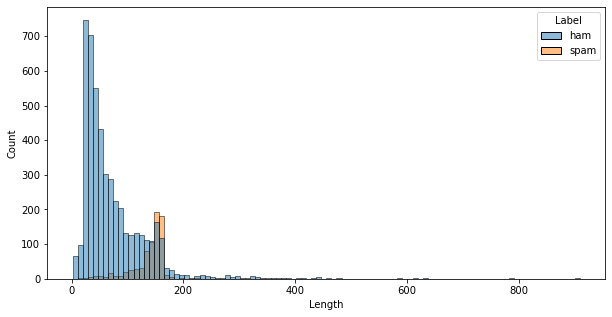

In [28]:
plt.figure(figsize=(10,5))
sns.histplot(data = df, x ='Length', bins = 100, hue = 'Label')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Label', ylabel='count'>

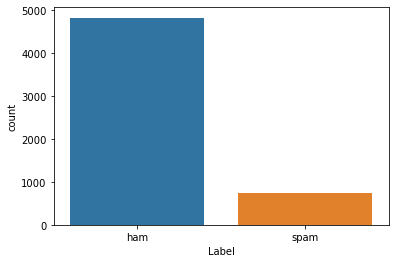

In [21]:
sns.countplot(df['Label'])

In [30]:
df.describe()

,Length
count,5572.000000
mean,80.489950
std,59.942907
min,2.000000
25%,36.000000
50%,62.000000
75%,122.000000
max,910.000000


In [31]:
df[df['Length'] == 910]

,Label,Message,Length
1085,ham,For me the love should start with attraction.i...,910


array([<AxesSubplot:title={'center':'ham'}>,
       <AxesSubplot:title={'center':'spam'}>], dtype=object)

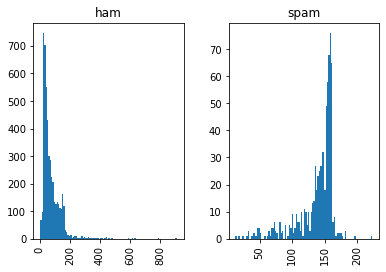

In [33]:
df.hist(column='Length', by = 'Label', bins = 100)

In [74]:
lem = WordNetLemmatizer()


In [72]:
#Type1 for pre-processing

def preprocessing(message):
    
    temp = [w for w in message if w not in string.punctuation]
    temp = "".join(temp)
    return[lem.lemmatize(w.lower()) for w in temp.split() if w.lower() not in stopwords.words('english')]

In [73]:
df['Message'].head(5).apply(preprocessing)

0    [go, jurong, point, crazy, available, bugis, n...
1                       [ok, lar, joking, wif, u, oni]
2    [free, entry, 2, wkly, comp, win, fa, cup, fin...
3        [u, dun, say, early, hor, u, c, already, say]
4    [nah, dont, think, go, usf, life, around, though]
Name: Message, dtype: object

In [99]:
#Type1 for pre-processing

corpus = []
for i in range(0, len(df)):
    cleaner = re.sub('[^a-zA-Z]', ' ', df['Message'][i])
    cleaner = cleaner.lower()
    cleaner = cleaner.split()
    
    cleaner = [lem.lemmatize(w) for w in cleaner if w not in stopwords.words('english')]
    cleaner = ' '.join(cleaner)
    corpus.append(cleaner)

In [100]:
 corpus[:20]

['go jurong point crazy available bugis n great world la e buffet cine got amore wat',
 'ok lar joking wif u oni',
 'free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply',
 'u dun say early hor u c already say',
 'nah think go usf life around though',
 'freemsg hey darling week word back like fun still tb ok xxx std chgs send rcv',
 'even brother like speak treat like aid patent',
 'per request melle melle oru minnaminunginte nurungu vettam set callertune caller press copy friend callertune',
 'winner valued network customer selected receivea prize reward claim call claim code kl valid hour',
 'mobile month u r entitled update latest colour mobile camera free call mobile update co free',
 'gonna home soon want talk stuff anymore tonight k cried enough today',
 'six chance win cash pound txt csh send cost p day day tsandcs apply reply hl info',
 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw'

### Apply Machine Learning to train the model and predict on test data

In [117]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer

cv = CountVectorizer(max_features=5000)
tv = TfidfVectorizer()
tt = TfidfTransformer()

In [104]:
Xcv = cv.fit_transform(corpus)
Xtv = tv.fit_transform(corpus)


In [106]:
Xcv.shape


(5572, 7098)

In [107]:
Xtv.shape

(5572, 7098)

In [109]:
y = pd.get_dummies(df['Label'], drop_first=True)

In [120]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Xcv, y, test_size=0.20, random_state=101)

In [121]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()

nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred))
confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       980
           1       0.85      0.94      0.89       135

    accuracy                           0.97      1115
   macro avg       0.92      0.96      0.94      1115
weighted avg       0.97      0.97      0.97      1115



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


array([[957,  23],
       [  8, 127]], dtype=int64)

In [112]:
from sklearn.model_selection import train_test_split

Xt_train, Xt_test, yt_train, yt_test = train_test_split(Xtv, y, test_size=0.20, random_state=101)

In [113]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()

nb.fit(Xt_train, yt_train)
yt_pred = nb.predict(Xt_test)

from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(yt_test, y_pred))
confusion_matrix(yt_test, yt_pred)

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       980
           1       0.85      0.94      0.89       135

    accuracy                           0.97      1115
   macro avg       0.92      0.96      0.94      1115
weighted avg       0.97      0.97      0.97      1115



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


array([[980,   0],
       [ 38,  97]], dtype=int64)